# Missing Values

**Table of Contents**

* [Introduction](#chapter1)
* [Types of Missing Data](#chapter2)
* [Dataset](#chapter3)
* [Missing Value Analysis](#chapter4)
* [Methods](#chapter5)
    * [5.1. Ignoring Missing Data](#subsection1)
    * [5.2. Delete Missing Data](#subsection2)
    * [5.3. Statistically Filling Missing Data (Mean-Median-Constant)](#subsection3)
    * [5.4. Other Filling Methods (Forward Fill - Backward Fill - Linear (Interpolation))](#subsection4)
    * [5.5. Advanced Imputation Techniques (Prediction of Missing Values) (KNN - Linear Regression - Random Forest Regressor)](#subsection5)
* [Result](#chapter6)

# 1. Introduction <a class="anchor"  id="chapter1"></a>

Missing values are a common problem in machine learning and data science projects. Failure to handle missing data correctly can skew the results of machine learning models or reduce the model's accuracy. To overcome these obstacles, we must either carefully remove missing values or carefully complete them. Either way, our goal is to create a complete dataset that will put our analysis on a solid footing. Ignoring missing data can directly affect the performance and reliability of our models. Therefore, it is extremely important to know the different techniques for dealing with missing values and choose the right method. While dealing with missing values is not our ultimate goal, it plays a critical role in data preprocessing steps and can help to significantly improve model performance. In this article, I will explain the causes and types of missing data and the advantages and disadvantages of various methods to deal with this problem.

Missing data can be caused by merging data sources, accidents or measurement errors during data collection, lack of records, respondent unwillingness to provide information, etc.

# 2. Types of Missing Data <a class="anchor"  id="chapter2"></a>

Missing data types are categorized into 3 groups in the literature:

**a. Missing Completely At Random (MCAR)**
In the MCAR case, there is no relationship between the missing data and the other values in the data set. In other words, the missing values are completely independent of the other data. As the missing values increase, the overall information content of the data set decreases. This can affect the accuracy and reliability of the analysis results.

**b. Missing At Random (MAR)**
MAR is a type of missing data where the missing data is correlated with other observed values. In this case, missing data does not occur randomly, but is missing according to a specific pattern. This pattern can be explained by a variable for which we have information about the cause of the missingness. If missing data of this type is ignored, the results of the analysis may not reflect the real situation.

**c. Missing Not At Random (MNAR)**
MNAR is a type of missing data where the missing data is due to unobserved data and cannot be explained by other observed data. If there is a structure or pattern in the missing data and this pattern cannot be explained by the observed data, it can be categorized as MNAR.

# 3. Dataset <a class="anchor"  id="chapter3"></a>

In this study, I will use the "UCI Heart Disease Data" set available in the UCI Data Repository. This dataset aims to predict whether a patient has heart disease based on certain characteristics. You can access the dataset here;

* https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
* 
* https://archive.ics.uci.edu/dataset/45/heart+disease

In the dataset, the target variable is given in 5 groups. These groups will be reduced to 2 (with heart disease, and without heart disease) and evaluated.

In addition, since this study does not focus on model development, I will encode the categorical variables and make the entire dataset numerical. The dataset I will use in the scope of the article looks as follows.

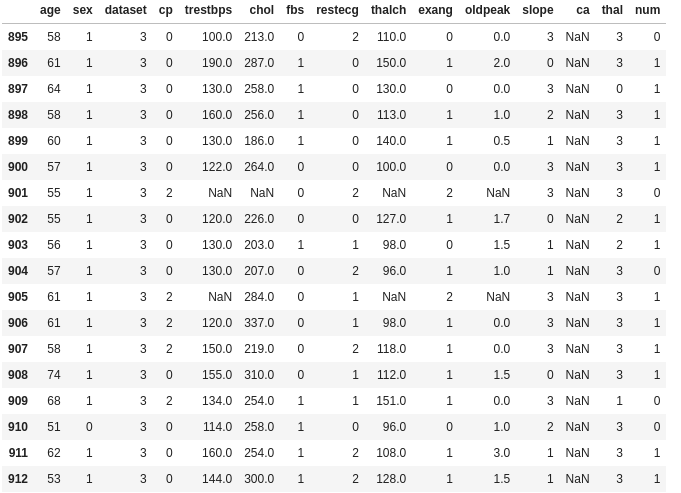

In [8]:
import pandas as pd

        
data = pd.read_csv("heart_disease_uci.csv")
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# 4. Missing Value Analysis <a class="anchor"  id="chapter4"></a>

Visualizations and summaries are the first step in understanding missing information in a dataset. Identifying how many and what types of missing values are present in our dataset is one of the first steps when dealing with missing values. A glance at the number of missing values in the dataset can give a good idea:

In [9]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

However, as well as the number of missing data, another point to look at is the proportion of missing data in the whole data set. The following function can be used for this analysis:

In [10]:
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table = missing_values(data)
missing_values_table

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
ca,611,66.4
thal,486,52.8
slope,309,33.6
fbs,90,9.8
oldpeak,62,6.7
trestbps,59,6.4
thalch,55,6.0
exang,55,6.0
chol,30,3.3
restecg,2,0.2


Although the proportion of missing values in the whole data set provides some information, it is not enough. One of the useful tools for analysis is missingno. [Missingno](https://github.com/ResidentMario/missingno), provides a flexible and easy-to-use toolkit that allows one to get a quick visual summary.

<Axes: >

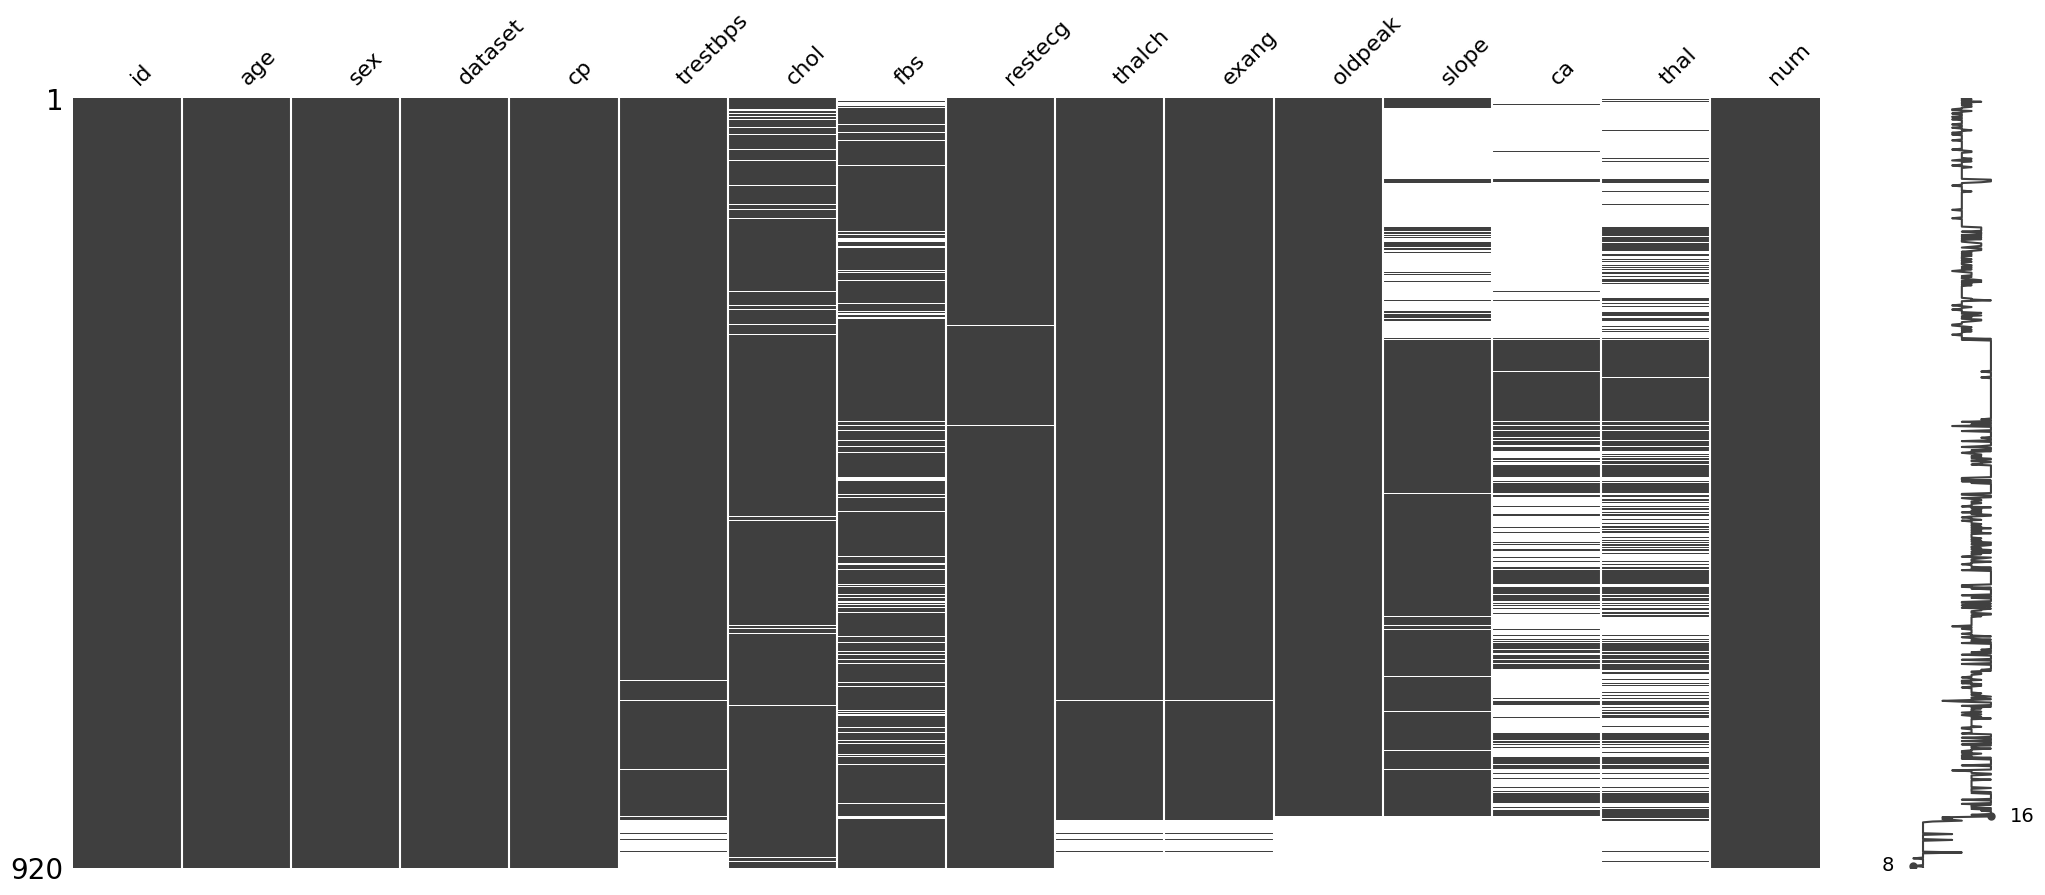

In [11]:
import missingno as msno # For visualizing missing data patterns

# To see how the data correlate with each other;

sorted = data.sort_values('oldpeak')
msno.matrix(sorted)

<Axes: >

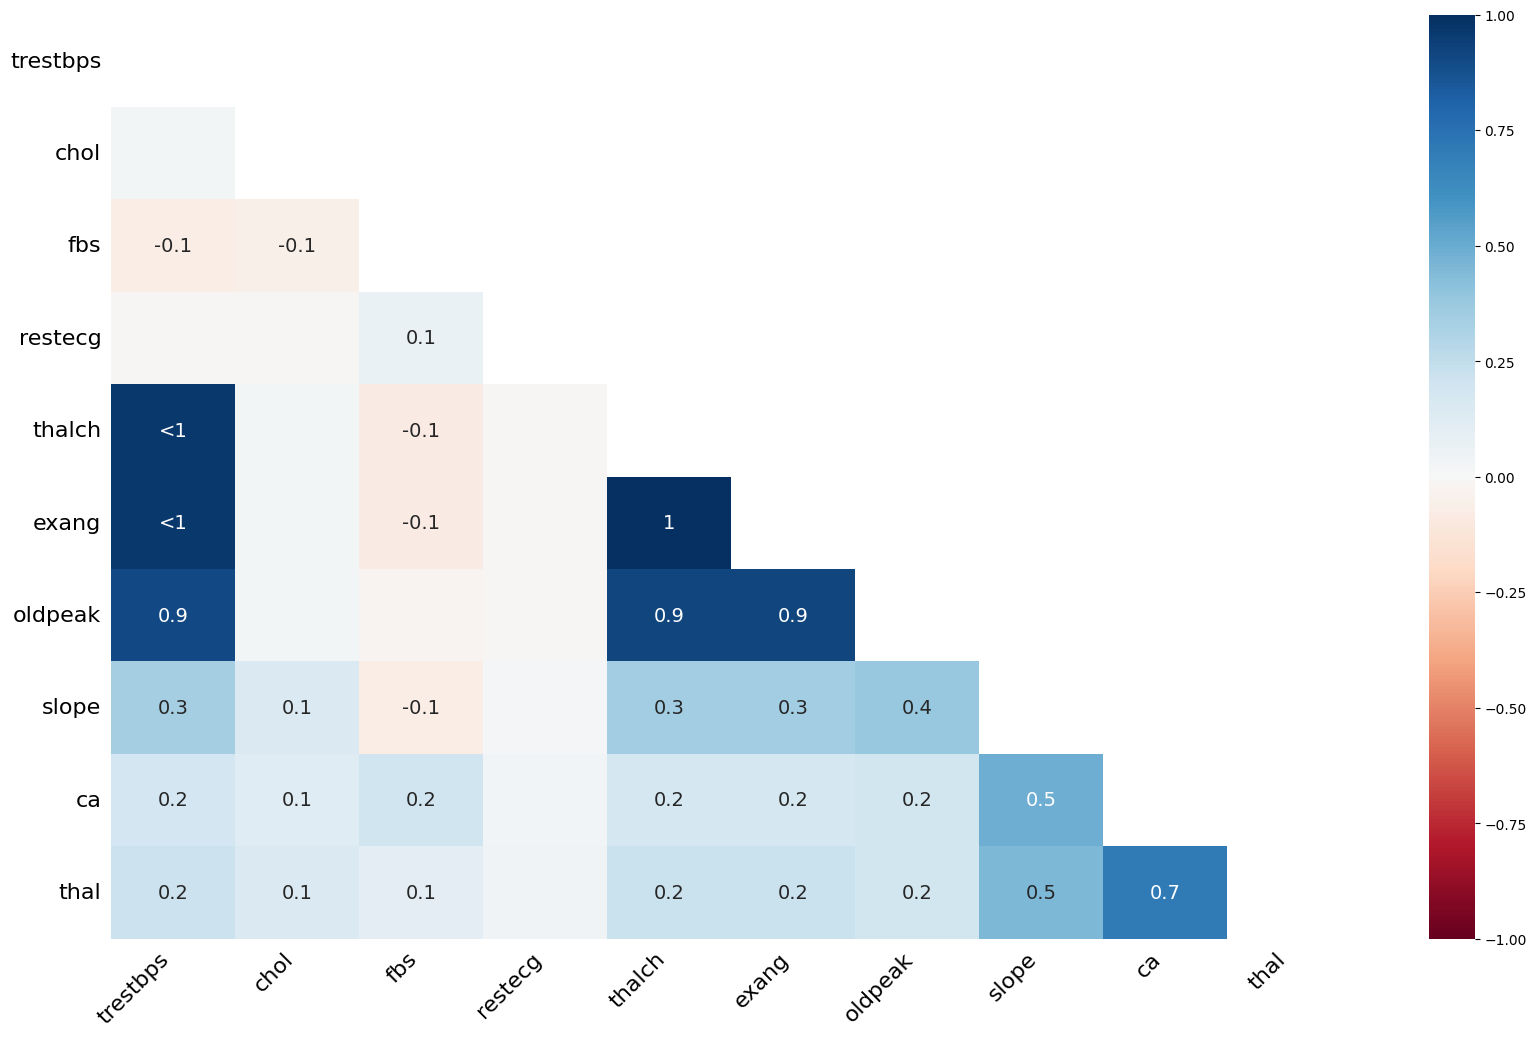

In [12]:
# You can also use a heat map for correlation:

msno.heatmap(data)

In this dataset, 'trestbps', 'thalch' and 'oldpeak' variables are highly correlated with each other. The reason behind this should be investigated, and we should take this into account when dealing with missing values.

<Axes: >

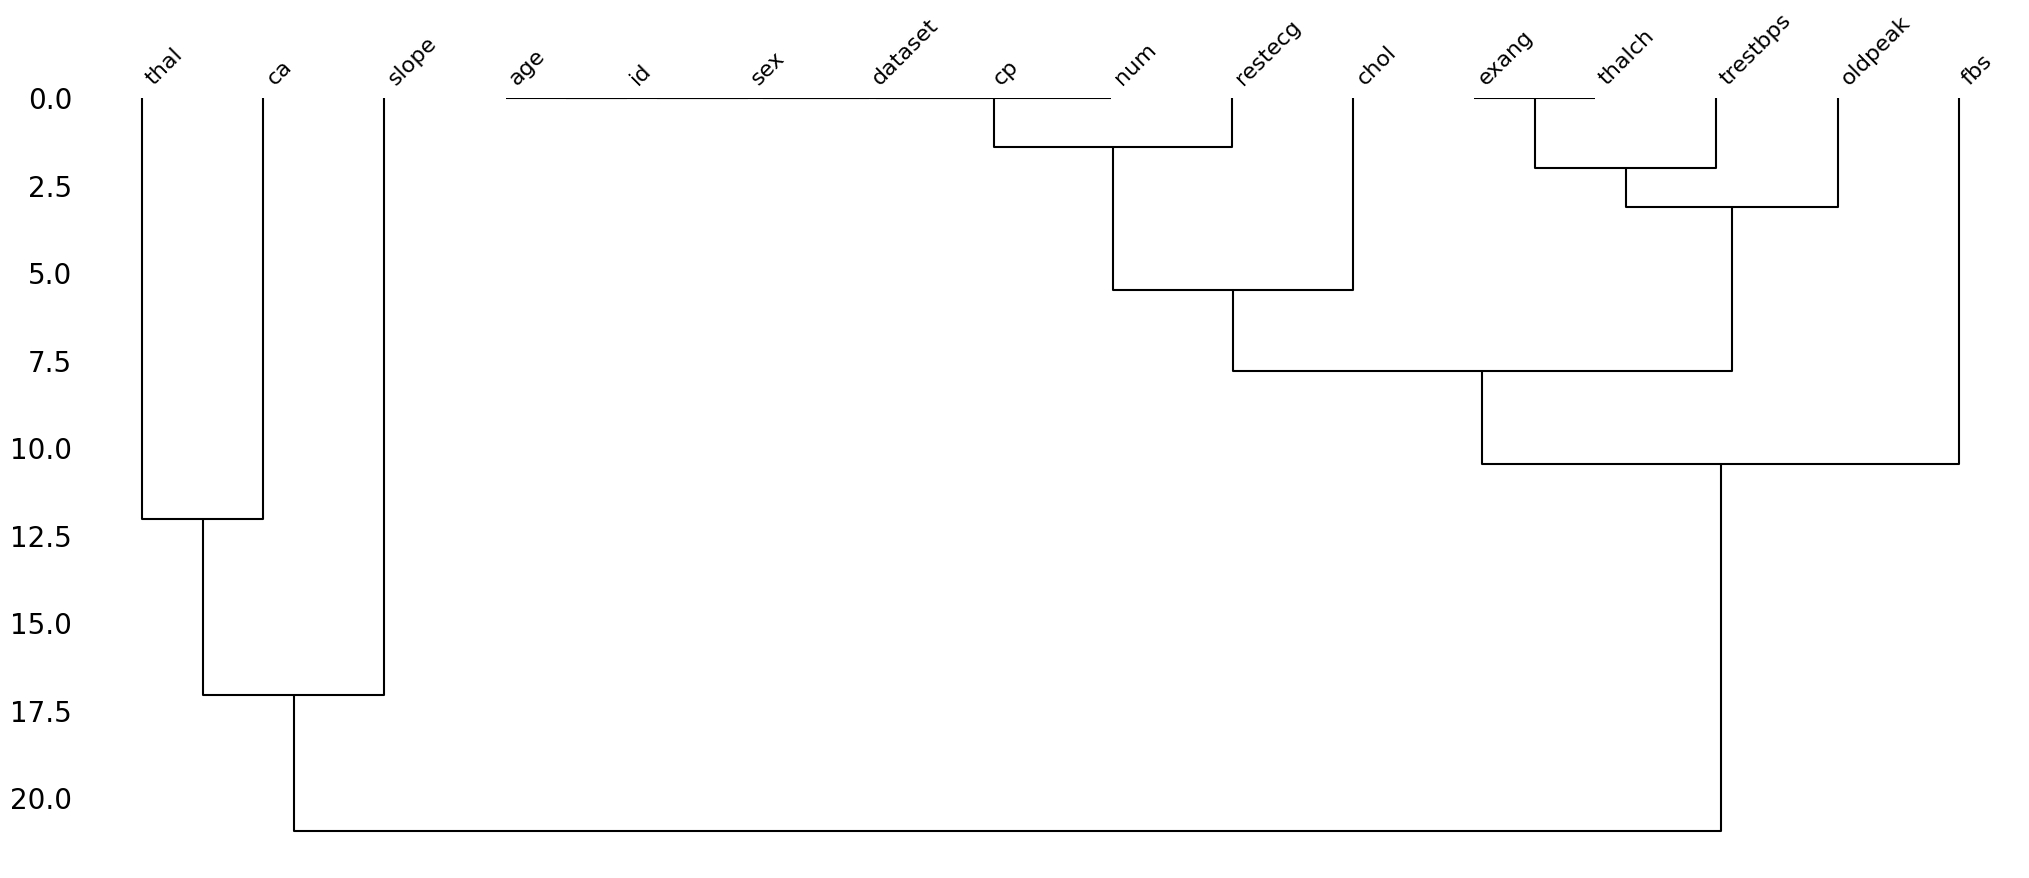

In [13]:
# Another point we can look at in visualization is the dendrogram.

msno.dendrogram(data)

This tree diagram groups variables with high correlation together. The variables at position 0 are not correlated with the missing variables. As I observed in the heatmap, the variables 'thalch', 'trestbps' and 'oldpeak' are highly correlated with each other. At the same time, these 3 variables are more correlated with 'thal' and 'chol' than 'ca'.

# 5. Methods <a class="anchor"  id="chapter5"></a>

There are multiple assignment methods we can use depending on whether the data is missing at random, the proportion of missing values, and the machine learning model we plan to use. It is important to handle missing data appropriately. If we want to use an algorithm that can work with missing data, perhaps we should leave it as it is. However, most algorithms cannot work with missing data and they need to be cleaned/edited.

In this study, each method was applied to the dataset, and the Random Forest Classifier model was trained with the new dataset. The accuracy of each method is shared and compared in the conclusion.

The most commonly used methods for dealing with missing data
* Using algorithms like XGBoost to ignore missing data
* Remove missing data by row or column
* Filling in missing data statistically
* Filling missing data with other methods
* Prediction of missing values

Before we move on to these methods, let's load the libraries and create the functions you need to run the notebook.

#### Import Libraries

In [14]:
import numpy as np # For linear algebra operations and numerical computations
import pandas as pd # For data analysis and manipulation using data frames


import missingno as msno # For visualizing missing data patterns

from sklearn.preprocessing import LabelEncoder # For converting categorical data to numerical values
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score # For calculating the accuracy score of a classification model
from sklearn.impute import KNNImputer # For imputing missing values using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classification model
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier model
from sklearn.metrics import mean_squared_error # Performance metric for regression models
from sklearn.impute import SimpleImputer # For imputing missing values with a simple strategy

from xgboost import XGBClassifier # XGBoost classification model

#### Functions

In [15]:
def read_data():
    """
    Reads the 'Heart disease' dataset,
    performs some editing, and returns it.
    """
    df = pd.read_csv("heart_disease_uci.csv")
    df['num'] = df['num'].replace({2: 1, 3: 1, 4: 1})
    df = df.drop('id', axis=1)
    df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
    
    categorical_columns = df.select_dtypes(include=['category']).columns

    # Convert categorical to numerical
    label_encoder = LabelEncoder()
    
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

def split_dataset(df):
    """
    Splits the dataset into training and testing sets.
    
    Parameters:
    - df (pd.DataFrame): The input dataset.
    
    Returns:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    """
    X = df.drop('num', axis=1)
    y = df['num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(f'Size of the Train: {X_train.shape[0]}')
    # print(f'Size of the Test: {X_test.shape[0]}')
    return X_train, X_test, y_train, y_test

def train_model_XGBoost(X_train, X_test, y_train, y_test):
    """
    Trains an XGBoost model on the given training set and evaluates it on the test set.
    
    Parameters:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    """
    # Create and train the XGBoost model
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")
    return accuracy
    
def train_model_random_forest(X_train, X_test, y_train, y_test):
    """
    Creates and trains a RandomForest model on the given training set 
    and evaluates its performance on the test set.
    
    Parameters:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    
    Returns:
    - accuracy (float): Accuracy score of the trained model on the test set.
    """
    # Create and train the RandomForest model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")
    return accuracy

# To compare the success of the methods
accuracies = {}

## 5.1. Ignoring Missing Data <a class="anchor"  id="subsection1"></a>

Most popular models (SVM, NN…) cannot work with missing data. However, there are a few predictive models that can handle missing data internally. In this step, we will train a model using XGBoost without handling missing values in the raw dataset.

In [16]:
# Read and preprocess the dataset
df = read_data()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df)

# Train an XGBoost model on the dataset without handling missing values
accuracy_no_handling = train_model_XGBoost(X_train, X_test, y_train, y_test)

# Store the accuracy of the model without handling missing values in a dictionary
accuracies['No Handling'] = accuracy_no_handling

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['chol']==385)]

Accuracy: 0.8586956521739131


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
918,58,1,3,0,NaN,385.0,1,0,NaN,2,NaN,3,NaN,3


**Pros:**
* Ignoring missing values simplifies the data preprocessing process. Instead of dealing with missing values, time is saved by feeding the dataset directly into the modeling algorithms.
* This method is preferable for creating a quick prototype at the beginning of a project. Modeling can be started immediately, rather than having to go through the detailed process of filling in or cleaning up missing values.
* Some machine learning algorithms can handle missing values directly and may not harm model performance. In particular, such algorithms, such as tree-based algorithms, can be robust to missing values.

**Cons:**
* It can lead to the loss of potentially valuable information from the dataset. Missing values can often be indicative of important patterns in the dataset and ignoring this information can negatively impact the performance of the model.
* It can reduce the predictive accuracy of the model. Missing values may prevent the model from generalizing correctly and lead to biased results.
* It can introduce bias into the patterns in the dataset. This can reduce the model's ability to fit real-world data and reduce the reliability of predictions.
* Some algorithms can be robust to missing values, but this can lead to reduced precision of the model. Filling in or cleaning up missing values can help the model make more accurate and reliable predictions.

## 5.2. Delete Missing Data <a class="anchor"  id="subsection2"></a>

If models that do not tolerate missing data are to be used, the missing values must be removed from the data set. The simplest approach is to delete all samples that contain missing values. Missing values can be eliminated by removing variables that contain at least one missing value. Similarly, removing all columns with missing values from the data set is another approach. Before using these approaches, however, some aspects of the data need to be carefully considered. The size of the data after deletion of missing data, the randomness of missing data, or the ratio of missing data to the entire data set are critical points to consider when applying these approaches.

This category consists of 3 stages. These stages are:
1. Pairwise Deletions
2. Listwise Deletions
3. Dropping Entire Columns

### a. Pairwise Deletions

If each data point has at least one missing value, that row of data is deleted from the entire list. This method can be used when the amount of missing data is small and the missing values are randomly distributed.

In [17]:
# Read and preprocess the dataset
df = read_data()

# 1. Pairwise Deletions
# Drop rows with any missing values (Pairwise Deletions)
df_pairwise = df.dropna()

# Split the dataset (after Pairwise Deletions) into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df_pairwise)

# Train a Random Forest model on the dataset after Pairwise Deletions
accuracy_pairwise = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Pairwise Deletions in a dictionary
accuracies['Pairwise'] = accuracy_pairwise

Accuracy: 0.8709677419354839



**Pros:**
* It is very useful for simplicity and computational efficiency.

**Cons:**
* It leads to a loss of information and a reduction in the number of samples. This can lead to insufficient data for the model.

### b. Listwise Deletions

All data instances with missing data from more than one variable are deleted. This method can be used when the amount of missing data is large or when the missing values are distributed according to a certain pattern.

In [18]:
# Read and preprocess the dataset
df = read_data()

# 2. Listwise Deletions
# Drop rows with missing values in specific columns
df_listwise = df.dropna(subset=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'])

# Split the dataset (after Listwise Deletions) into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df_listwise)

# Train a Random Forest model on the dataset after Listwise Deletions
accuracy_listwise = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Listwise Deletions in a dictionary
accuracies['Listwise'] = accuracy_listwise

Accuracy: 0.8709677419354839



**Pros:**
* As with Pairwise Deletions, it is very simple and low-cost to implement.

**Cons:**
* It may reduce the number of samples. This can lead to a destabilization of the dataset and loss of correlation.

### c. Dropping Entire Columns

All columns with too much missing data are deleted from the dataset. This method can be used when the amount of missing data is very large and the columns with missing data are not important for the analysis. However, this approach should only be used when there are many empty values in the column.

In [19]:
# Read and preprocess the dataset
df = read_data()

# 3. Dropping Entire Columns
# Drop entire columns with any missing values
df_dropping_entire_columns = df.dropna(axis=1)

# Split the dataset (after Dropping Entire Columns) into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df_dropping_entire_columns)

# Train a Random Forest model on the dataset after Dropping Entire Columns
accuracy_dropping_entire_columns = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Dropping Entire Columns in a dictionary
accuracies['Dropping Entire Columns'] = accuracy_dropping_entire_columns

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['restecg']==0) & (X_train['exang']==2)]

Accuracy: 0.8206521739130435


------------------


After Imputation: 



,age,sex,dataset,cp,fbs,restecg,exang,slope,thal
918,58,1,3,0,1,0,2,3,3


**Pros:**
* Like other deletions, this method offers a simple and computationally cost-effective solution.

**Cons:**
* Deleting all columns with missing values may result in the loss of important information in the dataset. This can negatively affect the accuracy and reliability of the model.
* While the simplicity of this method may be attractive, deleting columns has serious consequences for model performance.

## 5.3. Statistically Filling Missing Data (Mean-Median-Constant) <a class="anchor"  id="subsection3"></a>

Another approach to handling missing data is to statistically fill them in. The filling process uses relationships between non-missing data.

Some methods of this approach include filling in missing data with mean, median, or constant if the data are numeric and mode if the data are categorical.

### a. Mean and Median

**Mean:** This is the most common method of filling in missing values in numeric columns. This method may not be appropriate if there are outliers in the dataset. In such cases, outliers need to be addressed first.

**Median:** This is the value that divides the data series in half when we sort the dataset from smallest to largest. It is better to use the median if there are outliers in the data set.

In [20]:
def impute_and_train(X_train, y_train, X_test, y_test, strategy):
    """
    Imputes missing values in the training and testing sets using the specified strategy,
    trains a Random Forest model, and evaluates its performance on the test set.
    
    Parameters:
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.
    - strategy (str): Imputation strategy to handle missing values ('mean' or 'median').
    
    Returns:
    - accuracy (float): Accuracy score of the model on the test set.
    """
    # Impute missing values
    imputer = SimpleImputer(strategy=strategy)
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    
    # Train a Random Forest model on the imputed training set
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_imputed, y_train)

    # Evaluate the model on the imputed test set
    y_pred = rf_model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
        
    print(f"\n\nImputation strategy: {strategy}")
    print(f"Accuracy: {accuracy}\n")
    return accuracy, X_train_imputed

# Read and preprocess the dataset
df = read_data()
X_train, X_test, y_train, y_test = split_dataset(df)

# Train the model using different imputation strategies
strategies = ['mean', 'median']

for strategy in strategies:
    accuracy, X_train_imputed = impute_and_train(X_train, y_train, X_test, y_test, strategy)
    accuracies[strategy] = accuracy
    
    # A specific data, after the procedure
    print("\n------------------\n")
    print("\nAfter Imputation: \n")
    print(X_train_imputed[(X_train_imputed['age']==58.0) & (X_train_imputed['sex']==1.0) & (X_train_imputed['dataset']==3.0) & (X_train_imputed['chol']==385)])
    print("\n----------------------------\n----------------------------\n----------------------------")



Imputation strategy: mean
Accuracy: 0.842391304347826


------------------


After Imputation: 

     age  sex  dataset   cp    trestbps   chol  fbs  restecg      thalch  \
16  58.0  1.0      3.0  0.0  131.668596  385.0  1.0      0.0  137.383285   

    exang   oldpeak  slope     ca  thal  
16    2.0  0.881187    3.0  0.688   3.0  

----------------------------
----------------------------
----------------------------


Imputation strategy: median
Accuracy: 0.8478260869565217


------------------


After Imputation: 

     age  sex  dataset   cp  trestbps   chol  fbs  restecg  thalch  exang  \
16  58.0  1.0      3.0  0.0     130.0  385.0  1.0      0.0   140.0    2.0   

    oldpeak  slope   ca  thal  
16      0.5    3.0  0.0   3.0  

----------------------------
----------------------------
----------------------------


**Pros:**
* Easy to implement and fast.
* Minimizes information loss.
* Preserves the overall performance of the model.
* Conserves the size of the data set.
* More sensitive to outliers (Median Imputation).

**Cons:**
* May increase the impact of outliers (Mean Imputation).
* It can change the distribution between values.
* Distort the original structure of missing values.
* Reduces the natural variance of the data set.

### b. Constant

Constant filling is the process of filling missing values with a constant value (0, 100, 999, etc.). Although it has its advantages, it also has many disadvantages.

In [21]:
def constant_imputer(X_train, y_train, X_test, y_test):
    """
    Imputes missing values with a constant value (999) in the training and testing sets,
    trains a Random Forest model, and evaluates its performance on the test set.
    
    Parameters:
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.
    
    Returns:
    - accuracy (float): Accuracy score of the model on the test set.
    """
    # Impute missing values with a constant value (999)
    imputer = SimpleImputer(strategy='constant', fill_value=999)
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    
    # Train a Random Forest model on the imputed training set
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_imputed, y_train)

    # Evaluate the model on the imputed test set
    y_pred = rf_model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy}\n")
    return accuracy, X_train_imputed

# Read and preprocess the dataset
df = read_data()
X_train, X_test, y_train, y_test = split_dataset(df)

# Impute missing values with a constant value and train the model
accuracy_constant, X_train_imputed = constant_imputer(X_train, y_train, X_test, y_test)

# Store the accuracy of the model with constant imputation in a dictionary
accuracies['Constant Impute'] = accuracy_constant

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")

X_train_imputed[(X_train_imputed['age']==58.0) & (X_train_imputed['sex']==1.0) & (X_train_imputed['dataset']==3.0) & (X_train_imputed['chol']==385)]


Accuracy: 0.8315217391304348


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
16,58.0,1.0,3.0,0.0,999.0,385.0,1.0,0.0,999.0,2.0,999.0,3.0,999.0,3.0


**Pros:**
* Like other filling methods, it is a simple and quick approach.

**Cons:**
* It may cause a loss of information in the dataset as it fills missing values with a random or meaningless value.
* If an appropriate constant value is not chosen for missing values, it may negatively affect the performance of the model.

## 5.4. Other Filling Methods (Forward Fill - Backward Fill - Linear (Interpolation)) <a class="anchor"  id="subsection4"></a>

Depending on the nature of the data or the type of data, some other filling methods may be more appropriate for filling missing values. For example, for a time series dataset, it may make sense to use the last valid observation to fill in the missing value.

**Forward Fill:** All missing values are filled according to the corresponding value in the previous row.

**Backward Fill:** The missing value is found using the next value.

**Interpolation:** Missing values are estimated using the linear relationship between other values in the dataset. Pandas' interpolation method can be used to replace missing values with different interpolation methods such as 'polynomial', 'linear', and 'quadratic'. The default method is 'linear'.

*In the dataset we considered, the method could not be applied to all variables due to missing values in the last 2 columns of the 'ca' variable. To overcome this problem, I used a little trick in the code and used the mean method for this variable.*

In [22]:
def fill_missing_values(data, method='ffill'):
    """
    Fills missing values in the dataset using specified methods: 'ffill', 'bfill', or 'linear'.
    
    Parameters:
    - data (pd.DataFrame): Input dataset.
    - method (str): Method for filling missing values ('ffill', 'bfill', or 'linear').
    
    Returns:
    - filled_data (pd.DataFrame): Dataset with filled missing values.
    """
    if method == 'ffill':
        filled_data = data.fillna(method='ffill')
    elif method == 'bfill':
        data['ca'] = data['ca'].fillna(data['ca'].mean())
        filled_data = data.fillna(method='bfill')
    else:
        filled_data = data.interpolate(method='linear', limit_direction='forward')
    return filled_data

# Read and preprocess the dataset
data = read_data()

# Fill missing values using forward fill method
filled_data_ffill = fill_missing_values(data, method='ffill')
X_train_ffill, X_test_ffill, y_train_ffill, y_test_ffill = split_dataset(filled_data_ffill)

# Fill missing values using back fill method
filled_data_bfill = fill_missing_values(data, method='bfill')
X_train_bfill, X_test_bfill, y_train_bfill, y_test_bfill = split_dataset(filled_data_bfill)

# Fill missing values using linear interpolation method
filled_data_linear = fill_missing_values(data, method='linear')
X_train_linear, X_test_linear, y_train_linear, y_test_linear = split_dataset(filled_data_linear)

# A specific data, after the procedure
# Train Random Forest models on datasets with different filling methods
print("\n\n\nFfill method:")
accuracy_ffill = train_model_random_forest(X_train_ffill, X_test_ffill, y_train_ffill, y_test_ffill)
print("\n------------------\n")
print("\nAfter Imputation: \n")
print(X_train_ffill[(X_train_ffill['age']==58.0) & (X_train_ffill['sex']==1.0) & (X_train_ffill['dataset']==3.0) & (X_train_ffill['chol']==385)]
)
print("\n----------------------------\n----------------------------\n----------------------------")

print("\n\n\nBfill method:")
accuracy_bfill = train_model_random_forest(X_train_bfill, X_test_bfill, y_train_bfill, y_test_bfill)
print("\n------------------\n")
print("\nAfter Imputation: \n")
print(X_train_bfill[(X_train_bfill['age']==58.0) & (X_train_bfill['sex']==1.0) & (X_train_bfill['dataset']==3.0) & (X_train_bfill['chol']==385)]
)
print("\n----------------------------\n----------------------------\n----------------------------")

print("\n\n\nLinear method:")
accuracy_linear = train_model_random_forest(X_train_linear, X_test_linear, y_train_linear, y_test_linear)
print("\n------------------\n")
print("\nAfter Imputation: \n")
print(X_train_linear[(X_train_linear['age']==58.0) & (X_train_linear['sex']==1.0) & (X_train_linear['dataset']==3.0) & (X_train_linear['chol']==385)]
)
print("\n----------------------------\n----------------------------\n----------------------------")

# Store accuracies in a dictionary for comparison
accuracies['Ffill'] = accuracy_ffill
accuracies['Bfill'] = accuracy_bfill
accuracies['Linear'] = accuracy_linear




Ffill method:

C:\Users\moi\AppData\Local\Temp\ipykernel_5496\2657693665.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = data.fillna(method='ffill')
C:\Users\moi\AppData\Local\Temp\ipykernel_5496\2657693665.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = data.fillna(method='bfill')



Accuracy: 0.8478260869565217


------------------


After Imputation: 

     age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
918   58    1        3   0     122.0  385.0    1        0   100.0      2   

     oldpeak  slope   ca  thal  
918      0.0      3  0.0     3  

----------------------------
----------------------------
----------------------------



Bfill method:
Accuracy: 0.8315217391304348


------------------


After Imputation: 

     age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
918   58    1        3   0     120.0  385.0    1        0    93.0      2   

     oldpeak  slope        ca  thal  
918      0.0      3  0.676375     3  

----------------------------
----------------------------
----------------------------



Linear method:
Accuracy: 0.8532608695652174


------------------


After Imputation: 

     age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
918   58    1        3   0     121.0  385.0    1

**(Forward Fill) Pros:**
* Suitable for time series data.
* Provides a quick and simple solution.
* Helps preserve variance in the dataset.

**(Forward Fill) Cons:**
* May give incorrect results if missing values are consecutive.
* Does not take trends and seasonality into account.
* May ignore relationships between variables.

**(Backward Fill) Pros:**
* Suitable for time series data.
* Provides a quick and simple solution.
* Helps preserve variance in the dataset.

**(Backward Fill) Cons:**
* May give incorrect results if missing values are consecutive.
* Does not take trends and seasonality into account.
* May ignore relationships between variables.

**(Linear-Interpolation) Pros:**
* It considers the relationships between variables.
* Can provide more accurate forecasts.

**(Linear-Interpolation) Cons:**
* May increase the impact of outliers.
* Cannot accurately model complex relationships.

## 5.5. Advanced Imputation Techniques (Prediction of Missing Values) (KNN - Linear Regression - Random Forest Regressor) <a class="anchor"  id="subsection5"></a>

In previous methods for handling missing values, we did not take advantage of the correlation between the variable containing the missing value and other variables. Using other features that do not have missing values can be used to estimate missing values. Depending on the nature of the feature with missing values, regression or classification models can be used to estimate missing values.

### a. K-Nearest Neighbors (KNN)

KNN is a method that uses the K nearest neighbor algorithm to predict missing values. The algorithm identifies k data points to make a prediction. These k data points are those closest to the data point with the missing value. If the data set is continuous, the Euclidean distance can be used as a distance measure, and if the data set is categorical, the Hamming distance can be used.

In [23]:
def knn_impute(X_train, X_test, y_train, y_test, k=5):
    """
    Imputes missing values using the K-Nearest Neighbors (KNN) algorithm.

    Parameters:
    - X_train: pandas DataFrame, training dataset
    - X_test: pandas DataFrame, testing dataset
    - y_train: pandas Series, training labels
    - y_test: pandas Series, testing labels
    - k: int, number of neighbors for KNN imputation

    Returns:
    - X_train_imputed, X_test_imputed, y_train, y_test: pandas DataFrames and Series,
      imputed training and testing datasets along with labels
    """
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
    return X_train_imputed, X_test_imputed, y_train, y_test

# Read and preprocess the dataset
df = read_data()
X_train, X_test, y_train, y_test = split_dataset(df)

# Impute missing values using KNN
X_train_imputed, X_test_imputed, y_train, y_test = knn_impute(X_train, X_test, y_train, y_test, k=10)

# Train a Random Forest model on the imputed dataset
accuracy_knn = train_model_random_forest(X_train_imputed, X_test_imputed, y_train, y_test)

# Store the accuracy of the model with KNN imputation in a dictionary
accuracies['KNN'] = accuracy_knn

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train_imputed[(X_train_imputed['age']==58.0) & (X_train_imputed['sex']==1.0) & (X_train_imputed['dataset']==3.0) & (X_train_imputed['chol']==385)]

Accuracy: 0.8532608695652174


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
16,58.0,1.0,3.0,0.0,141.4,385.0,1.0,0.0,125.6,2.0,0.45,3.0,0.7,3.0


**Pros:**
1. Takes into account the relationship between variables.
1. Effectively handles categorical and numerical data.
1. Easily adaptable to new data points.

**Cons:**
* Computational costs can be high for large datasets.
* It may be difficult to determine the optimal K value.
* Performance may be degraded for high-dimensional datasets.
* Affected by outliers.

## b. Linear Regression

Linear Regression is a regression technique that expresses the relationship between the dependent variable and the independent variables in a linear model. It can be used to estimate missing values because it builds a linear model on the dataset with missing values.

In [24]:
def linear_regression_impute(df, target_column, feature_columns):
    """
    Imputes missing values using linear regression.

    Parameters:
    - df: pandas DataFrame, input dataset
    - target_column: str, target column with missing values to be imputed
    - feature_columns: list, feature columns used to predict missing values

    Returns:
    - pd.DataFrame, dataset with imputed missing values
    """
    # Separate missing and non-missing values
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])

    # Create training and test sets for the model
    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values using the model
    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    # Create a dataset with imputed missing values
    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values

    return df_filled

# Impute missing values using linear regression
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

linear_data = read_data()

for target_column in target_columns_to_impute:
    linear_data = linear_regression_impute(linear_data, target_column, feature_columns_for_imputation)

# Split the dataset after linear regression imputation
X_train, X_test, y_train, y_test = split_dataset(linear_data)

# Train a Random Forest model on the imputed dataset
accuracy_linear_reg = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model with linear regression imputation in a dictionary
accuracies['Linear Regression'] = accuracy_linear_reg

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['chol']==385)]

Accuracy: 0.8532608695652174


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
918,58,1,3,0,143.469093,385.0,1,0,104.142288,2,0.712014,3,0.757839,3


**Pros:**
* It takes into account the relationship between the variable containing the missing values and other variables.
* It has a fast calculation time.

**Cons:**
* It works on the assumption of a linear relationship between variables.
* It cannot capture non-linear relationships in the dataset.
* May be sensitive to the impact of outliers.

### c. Random Forest Regressor

Random Forest Regressor is an ensemble regression algorithm where many decision trees are built together and the predictions are aggregated. It can be used to predict missing values because it can work with both categorical and numerical data and it is possible to train the trees independently. In addition, these models usually have good accuracy and don't predict outliers.

In [25]:
def random_forest_impute(df, target_column, feature_columns):
    """
    Imputes missing values using Random Forest.

    Parameters:
    - df: pandas DataFrame, input dataset
    - target_column: str, target column with missing values to be imputed
    - feature_columns: list, feature columns used to predict missing values

    Returns:
    - pd.DataFrame, dataset with imputed missing values
    """
    # Separate missing and non-missing values
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])

    # Create training and test sets for the model
    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    # Create a Random Forest regression model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values using the model
    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    # Create a dataset with imputed missing values
    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values

    return df_filled

# Impute missing values using Random Forest
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

random_data = read_data()

for target_column in target_columns_to_impute:
    random_data = random_forest_impute(random_data, target_column, feature_columns_for_imputation)

# Split the dataset after Random Forest imputation
X_train, X_test, y_train, y_test = split_dataset(random_data)

# Train a Random Forest model on the imputed dataset
accuracy_random_forest = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model with Random Forest imputation in a dictionary
accuracies['Random Forest'] = accuracy_random_forest

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['chol']==385)]

Accuracy: 0.8260869565217391


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
918,58,1,3,0,158.763333,385.0,1,0,114.42,2,0.892,3,1.285667,3


**Pros:**
* Provides high predictive performance
* Resistant to the effect of outliers.
* Useful for identifying important features in a dataset.

**Cons:**
* Managing the complexity of the model can be difficult.
* Hyperparameters such as number of trees and depth may need to be adjusted.
* Training times can be long for large datasets.

# 6. Result <a class="anchor"  id="chapter6"></a>

Addressing missing values is a critical step in the data analysis process. There is no perfect way to fill in missing values in a dataset. Understanding why data is missing is crucial to manage the remaining data appropriately. Each method has advantages and disadvantages and is suitable for different types of missing data values. Furthermore, improper handling of missing data can affect the results of machine learning models and reduce model accuracy. Therefore, the correct assignment of missing values is critical in data analysis.


The following table shows the accuracy rates of the methods discussed in this paper. As can be seen from the table, in some cases, leaving missing data untouched or choosing the simplest method shows better results than other complex methods. Nevertheless, it should be kept in mind that these methods and the algorithms used in model building can directly change the result.

In [26]:
# Translate Dictionary to DataFrame
df = pd.DataFrame(list(accuracies.items()), columns=['Method', 'Accuracy'])

# Formatting
df['Accuracy'] = df['Accuracy'].apply(lambda x: round(x, 3))
df

,Method,Accuracy
0,No Handling,0.859
1,Pairwise,0.871
2,Listwise,0.871
3,Dropping Entire Columns,0.821
4,mean,0.842
5,median,0.848
6,Constant Impute,0.832
7,Ffill,0.848
8,Bfill,0.832
9,Linear,0.853


Thank you for reading and your questions and comments;

* LinkedIn: https://www.linkedin.com/in/ramazanolmez/
* Mail: ramazanolmeez@gmail.com